**Import Libraries**

In [553]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
!pip install --upgrade matplotlib==3.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing and Reading Dataset**

In [554]:
df = pd.read_csv('https://raw.githubusercontent.com/zeerakb1/dataset/main/tv_shows.csv', index_col='Unnamed: 0')
df.head()


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


**Data Information**

In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 0 to 5367
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               5368 non-null   int64 
 1   Title            5368 non-null   object
 2   Year             5368 non-null   int64 
 3   Age              3241 non-null   object
 4   IMDb             4406 non-null   object
 5   Rotten Tomatoes  5368 non-null   object
 6   Netflix          5368 non-null   int64 
 7   Hulu             5368 non-null   int64 
 8   Prime Video      5368 non-null   int64 
 9   Disney+          5368 non-null   int64 
 10  Type             5368 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 503.2+ KB


**Check for Null values**

In [556]:
df.isnull().sum()

ID                    0
Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

**Data Cleaning**

We don't need `ID` and `Type` column, so we will remove it. `ID` column are not ordered and not unique. We also don't need `Type` column as all values are samewhich won't help us in our analysis, also the dataset contains all the TV shows. We change the index column name to `Id`.

In [557]:
df.drop(['ID', 'Type'], axis=1, inplace=True)
df.index.name = 'Id'
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
Id,,,,,,,,,
0,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,Dark,2017,16+,8.8/10,93/100,1,0,0,0


**Converting IMDb and Rotten Tomatoes to appropriate data type and format**

In [558]:
df['IMDb'] = df['IMDb'].str.split('/', n=1, expand=True)[0].astype('float')
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.split('/', n=1, expand=True)[0].astype('float') / 10
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
Id,,,,,,,,,
0,Breaking Bad,2008,18+,9.4,10.0,1,0,0,0
1,Stranger Things,2016,16+,8.7,9.6,1,0,0,0
2,Attack on Titan,2013,18+,9.0,9.5,1,1,0,0
3,Better Call Saul,2015,18+,8.8,9.4,1,0,0,0
4,Dark,2017,16+,8.8,9.3,1,0,0,0


**Dealing with Null Values**

In [559]:
def findMode(row, col):
    if pd.isnull(row[col]):
        row[col] =  df[(df['Netflix'] == row['Netflix']) & 
                    (df['Hulu'] == row['Hulu']) & 
                    (df['Prime Video'] == row['Prime Video']) & 
                    (df['Disney+'] == row['Disney+'])][col].mode()[0]
    return row


def findMean(row, col):
    if pd.isnull(row[col]):
        row[col] =  round(df[(df['Netflix'] == row['Netflix']) & 
                          (df['Hulu'] == row['Hulu']) & 
                          (df['Prime Video'] == row['Prime Video']) & 
                          (df['Disney+'] == row['Disney+'])][col].mean(), 1)
    return row
df = df.apply(lambda row: findMean(row, 'IMDb'), axis=1)

df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
Id,,,,,,,,,
0,Breaking Bad,2008,18+,9.4,10.0,1,0,0,0
1,Stranger Things,2016,16+,8.7,9.6,1,0,0,0
2,Attack on Titan,2013,18+,9.0,9.5,1,1,0,0
3,Better Call Saul,2015,18+,8.8,9.4,1,0,0,0
4,Dark,2017,16+,8.8,9.3,1,0,0,0


**Number of shows on each platform**

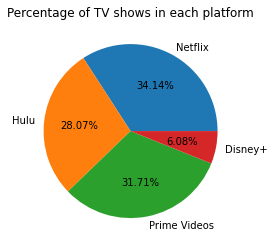

In [560]:
netflix_shows = df[df['Netflix'] == 1]['Netflix'].count()
hulu_shows = df[df['Hulu'] == 1]['Hulu'].count()
prime_videos_shows = df[df['Prime Video'] == 1]['Prime Video'].count()
disney_shows = df[df['Disney+'] == 1]['Disney+'].count()

y = np.array([netflix_shows, hulu_shows, prime_videos_shows, disney_shows])
mylabels = ["Netflix", "Hulu", "Prime Videos", "Disney+"]

plt.pie(y, labels= mylabels, autopct='%1.2f%%')
plt.title('Percentage of TV shows in each platform')
plt.show()

**Number of releases each year**

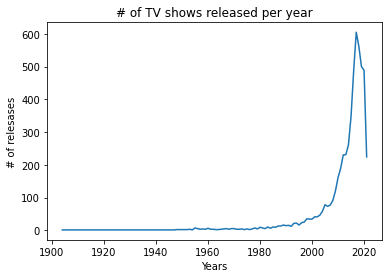

In [561]:
year = list(df['Year'].value_counts().index)
year.sort()
dataset = { }
for i in year:
    dataset[i] = len(df[df['Year'] == i])
    
plt.plot((list(dataset.keys())), (list(dataset.values())))
plt.xlabel('Years')
plt.ylabel('# of relesases')
plt.title('# of TV shows released per year')
plt.show()

**Mean ratings of TV shows on each platform**

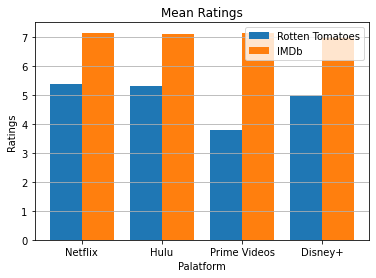

In [562]:

netflix_shows = list(df[df['Netflix'] == 1]['IMDb'].values)
hulu_shows = list(df[df['Hulu'] == 1]['IMDb'].values)
prime_videos_shows = list(df[df['Prime Video'] == 1]['IMDb'].values)
disney_shows = list(df[df['Disney+'] == 1]['IMDb'].values)

netflix_shows1 = list(df[df['Netflix'] == 1]['Rotten Tomatoes'].values)
hulu_shows1 = list(df[df['Hulu'] == 1]['Rotten Tomatoes'].values)
prime_videos_shows1 = list(df[df['Prime Video'] == 1]['Rotten Tomatoes'].values)
disney_shows1 = list(df[df['Disney+'] == 1]['Rotten Tomatoes'].values)


y1 = [sum(netflix_shows1) / len(netflix_shows1), 
     sum(hulu_shows1) / len(hulu_shows1), 
     sum(prime_videos_shows1)/ len(prime_videos_shows1), 
     sum(disney_shows1) / len(disney_shows1)]


y2 = [sum(netflix_shows) / len(netflix_shows), 
     sum(hulu_shows) / len(hulu_shows), 
     sum(prime_videos_shows)/ len(prime_videos_shows), 
     sum(disney_shows) / len(disney_shows)]

mylabels = ["Netflix", "Hulu", "Prime Videos", "Disney+"]
keys = np.arange(len(mylabels))
plt.grid(True, axis='y')
plt.xlabel("Palatform")
plt.ylabel("Ratings")
plt.title("Mean Ratings")
plt.bar(keys - 0.2, y1, 0.4, label = 'Rotten Tomatoes')
plt.bar(keys + 0.2, y2, 0.4, label = 'IMDb')
plt.xticks(keys, mylabels)
plt.legend(loc = "upper right")
plt.show()


**Age group frequency per platform**

<AxesSubplot:>

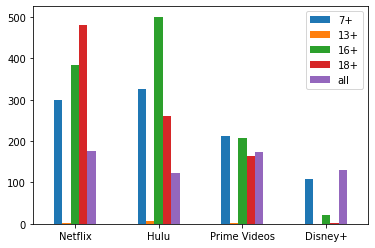

In [563]:
netflix_shows = df[df['Netflix'] == 1]['Age']
hulu_shows = df[df['Hulu'] == 1]['Age']
prime_videos_shows = df[df['Prime Video'] == 1]['Age']
disney_shows = df[df['Disney+'] == 1]['Age']
ageGroup = ['7+', '13+', '16+', '18+', 'all']
dataset = { }
for i in ageGroup:
    names = list(netflix_shows.value_counts().index)
    if i in names:
        netflix_v = netflix_shows.value_counts()[i]
    else:
        netflix_v = 0
    
    names = list(hulu_shows.value_counts().index)
    if i in names:
        hulu_v = hulu_shows.value_counts()[i]
    else:
        hulu_v = 0

    names = list(prime_videos_shows.value_counts().index)
    if i in names:
        prime_v = prime_videos_shows.value_counts()[i]
    else:
        prime_v = 0

    names = list(disney_shows.value_counts().index)
    if i in names:
        disney_v = disney_shows.value_counts()[i]
    else:
        disney_v = 0
    dataset[i] = [netflix_v, hulu_v, prime_v, disney_v]


frame = pd.DataFrame(dataset, index=mylabels)
frame.plot.bar(rot=0)

**Number of TV shows per year for each platform**

In [564]:
year1 = list(df[df['Netflix'] == 1]['Year'].value_counts().index)
year2 = list(df[df['Hulu'] == 1]['Year'].value_counts().index)
year3 = list(df[df['Prime Video'] == 1]['Year'].value_counts().index)
year4 = list(df[df['Disney+'] == 1]['Year'].value_counts().index)

year1.sort()
year2.sort()
year3.sort()
year4.sort()

dataset1 = { }
dataset2 = { }
dataset3 = { }
dataset4 = { }

for i in year1:
    dataset1[i] = len(df[(df['Netflix'] == 1) & (df['Year'] == i)])
for i in year2:
    dataset2[i] = len(df[(df['Hulu'] == 1) & (df['Year'] == i)])
for i in year3:
    dataset3[i] = len(df[(df['Prime Video'] == 1) & (df['Year'] == i)])
for i in year4:
    dataset4[i] = len(df[(df['Disney+'] == 1) & (df['Year'] == i)])


**Plotting number of shows over the years for each platform**

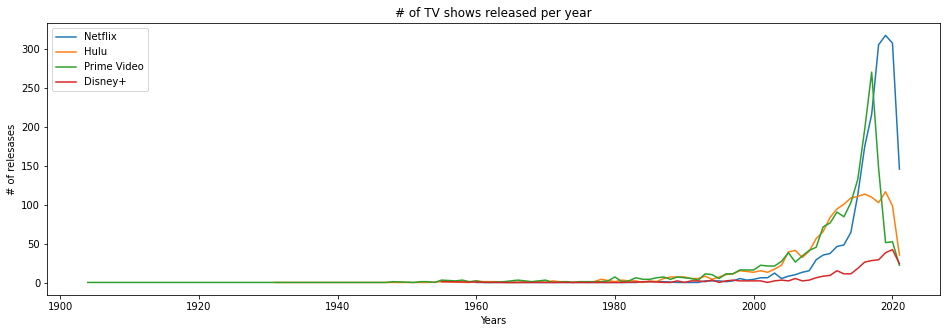

In [565]:
plt.figure(figsize = (16,5))
plt.plot((list(dataset1.keys())), (list(dataset1.values())), label='Netflix')
plt.plot((list(dataset2.keys())), (list(dataset2.values())), label='Hulu')
plt.plot((list(dataset3.keys())), (list(dataset3.values())), label='Prime Video')
plt.plot((list(dataset4.keys())), (list(dataset4.values())), label='Disney+')
plt.xlabel('Years')
plt.ylabel('# of relesases')
plt.title('# of TV shows released per year')
plt.legend()
plt.show()

**`Question 1:`** **How have the mean ratings of TV-shows changed over the years on different platforms? and can we predict the ratings for the coming years?**

**Function to get Ratings for each platform**

In [566]:

def getRating(df, platform):
  platform_df = df[df[platform] == 1].sample(n = 100, random_state = 1)
  d_set_imdb = {}
  d_set_rotten = {}
  years = platform_df[platform_df['Year'] >= 2000]['Year'].value_counts()
  years.sort_values()
  years = list(years.keys())
  years.sort()
  for i in years:
    d_set_imdb[i] = platform_df[platform_df['Year'] == i]['IMDb'].mean() 
    d_set_rotten[i] =  platform_df[platform_df['Year'] == i]['Rotten Tomatoes'].mean()
  return d_set_imdb, d_set_rotten

netflix_imdb, netflix_rotten = getRating(df, 'Netflix')
hulu_imdb, hulu_rotten  = getRating(df, 'Hulu')
prime_imdb, prime_rotten = getRating(df, 'Prime Video')
disney_imdb, disney_rotten = getRating(df, 'Disney+')



**Using Linear Regression Model to train and predict ratings**

In [567]:
def predict_linearreg(data1, data2):
  train_y = np.array(list(data1.values()))
  X =  np.array((list(data1.keys())))
  train_X = []
  for each in X:
    train_X.append([each])


  regr = linear_model.LinearRegression()
  regr.fit(train_X, train_y)
  X_test = [[2022],[2023],[2024],[2025],[2026]]
  y_pred = regr.predict(X_test)
  pred1 = (train_X,train_y,X_test,y_pred)

  train_y = np.array(list(data2.values()))
  X =  np.array((list(data2.keys())))
  train_X = []
  for each in X:
    train_X.append([each])


  regr = linear_model.LinearRegression()
  regr.fit(train_X, train_y)
  X_test = [[2022],[2023],[2024],[2025],[2026]]
  y_pred = regr.predict(X_test)
  pred2 = (train_X,train_y,X_test,y_pred)
  return (pred1,pred2)
  

**Helper function for plotting**

In [568]:
def plot_helper(imdb_data, rotten_data, label):
  train_X_imdb, train_y_imdb, X_test_imdb, y_pred_imdb = imdb_data
  train_X_rotten, train_y_rotten, X_test_rotten, y_pred_rotten = rotten_data

  print('Platform:', label)
  print('Mean IMDb rating of TV shows in year 2026:', round(y_pred_imdb[4], 2))
  print('Mean Rotten Tomatoes rating of TV shows in year 2026:', round(y_pred_rotten[4], 2))
  plt.figure(figsize = (16,5))
  plt.scatter(train_X_imdb, train_y_imdb, color="blue", label='IMDb')
  plt.axline(xy1=(X_test_imdb[0][0], y_pred_imdb[0]), xy2=(X_test_imdb[1][0], y_pred_imdb[1]), color='blue')
  plt.scatter(train_X_rotten, train_y_rotten, color="green", label='Rotten Tomatoes')
  plt.axline(xy1=(X_test_rotten[0][0], y_pred_rotten[0]), xy2=(X_test_rotten[1][0], y_pred_rotten[1]), color='green')
  plt.ylim(0, 10)
  plt.legend()
  plt.xlabel('Years')
  plt.ylabel('Ratings')
  plt.title(label)
  
  plt.show()

**Calling Linear regression function for each platform**

In [569]:
netflix_imdb_data,netflix_rotten_data = predict_linearreg(netflix_imdb, netflix_rotten)
hulu_imdb_data,hulu_rotten_data = predict_linearreg(hulu_imdb, hulu_rotten)
prime_imdb_data,prime_rotten_data = predict_linearreg(prime_imdb, prime_rotten)
disney_imdb_data,disney_rotten_data = predict_linearreg(disney_imdb, disney_rotten)

**Plotting results**

Platform: Hulu
Mean IMDb rating of TV shows in year 2026: 6.44
Mean Rotten Tomatoes rating of TV shows in year 2026: 3.94


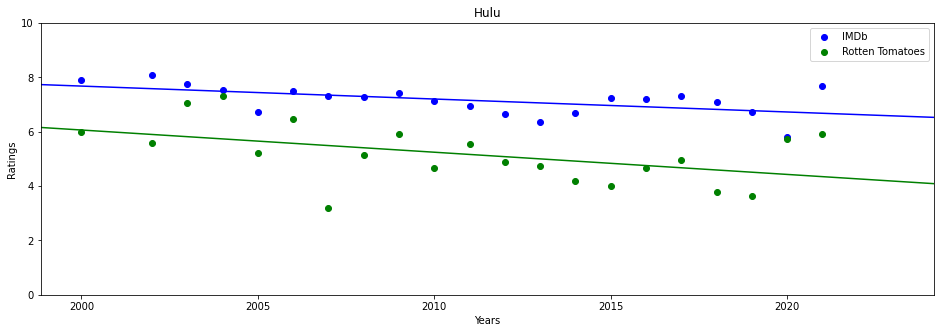

In [570]:
plot_helper(hulu_imdb_data, hulu_rotten_data, 'Hulu')

Platform: Netflix
Mean IMDb rating of TV shows in year 2026: 7.2
Mean Rotten Tomatoes rating of TV shows in year 2026: 5.22


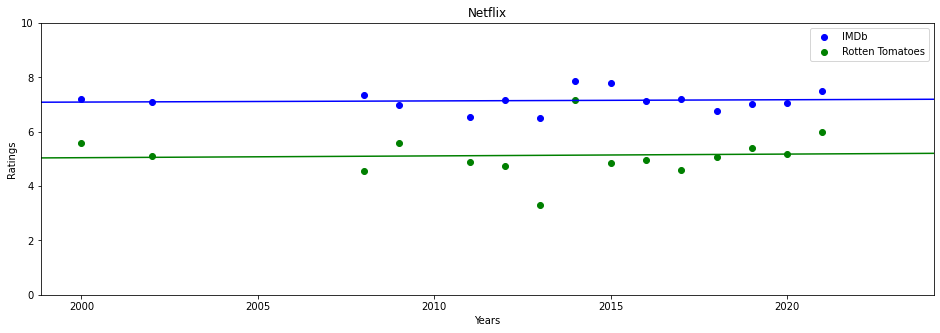

In [571]:
plot_helper(netflix_imdb_data, netflix_rotten_data, 'Netflix')

Platform: Prime Video
Mean IMDb rating of TV shows in year 2026: 6.44
Mean Rotten Tomatoes rating of TV shows in year 2026: 3.43


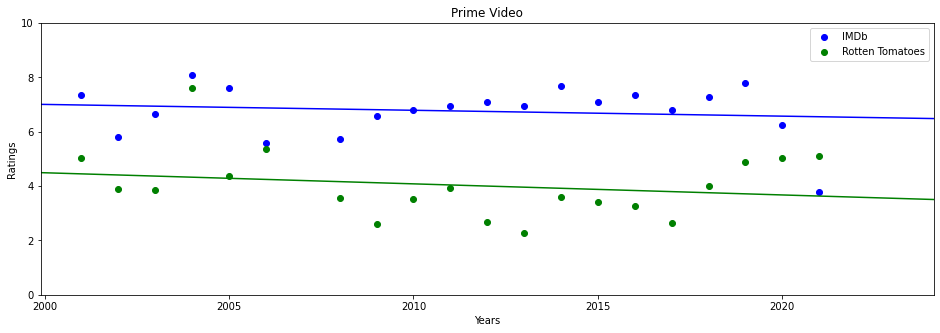

In [572]:
plot_helper(prime_imdb_data, prime_rotten_data, 'Prime Video')

Platform: Disney+
Mean IMDb rating of TV shows in year 2026: 7.24
Mean Rotten Tomatoes rating of TV shows in year 2026: 4.57


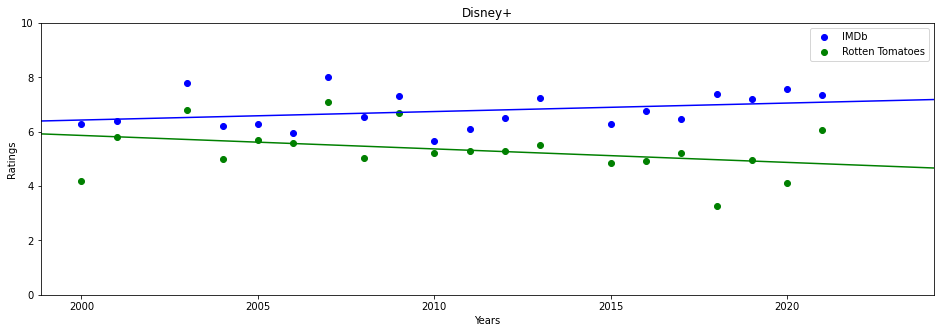

In [573]:
plot_helper(disney_imdb_data, disney_rotten_data, 'Disney+')

**`Question 2:`** **What is the yearly change in percentage of tv shows hosted on each of the 4 platforms.**

**Function to get rate of change for each platform**

In [574]:
def getRateOfChange(df):
  netflix_years = df[(df['Netflix'] == 1) & (df['Year'] >= 2000)]['Year'].value_counts()
  hulu_years = df[(df['Hulu'] == 1) & (df['Year'] >= 2000)]['Year'].value_counts()
  prime_years = df[(df['Prime Video'] == 1) & (df['Year'] >= 2000)]['Year'].value_counts()
  disney_years = df[(df['Disney+'] == 1)& (df['Year'] >= 2000)]['Year'].value_counts()

  netflix_years = netflix_years.sort_index()
  hulu_years = hulu_years.sort_index()
  prime_years = prime_years.sort_index()
  disney_years = disney_years.sort_index()
  
  return {'Netflix': dict(netflix_years.pct_change().T), 
          'Hulu': dict(hulu_years.pct_change().T), 
          'Prime Video': dict(prime_years.pct_change().T), 
          'Disney+': dict(disney_years.pct_change().T)}

rates = getRateOfChange(df)

**Plotting graphs for each platform**

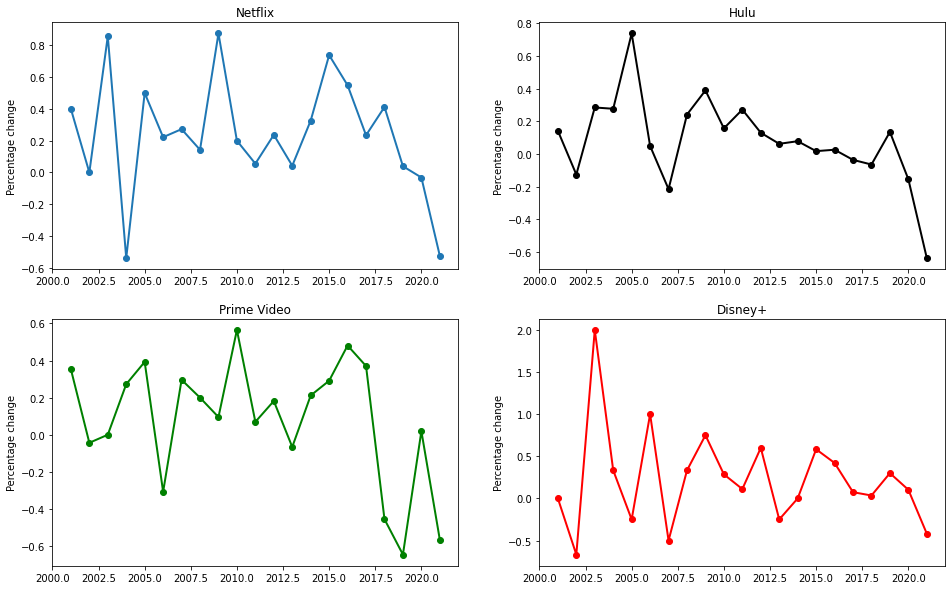

In [575]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(list(rates['Netflix'].keys()), list(rates['Netflix'].values()), 'o-', linewidth=2)
ax2.plot(list(rates['Hulu'].keys()), list(rates['Hulu'].values()), 'o-', color='black', linewidth=2)
ax3.plot(list(rates['Prime Video'].keys()), list(rates['Prime Video'].values()), 'o-', color='green',  linewidth=2)
ax4.plot(list(rates['Disney+'].keys()), list(rates['Disney+'].values()), 'o-', color='red', linewidth=2)
ax1.title.set_text('Netflix')
ax1.set_ylabel('Percentage change')
ax2.title.set_text('Hulu')
ax2.set_ylabel('Percentage change')
ax3.title.set_text('Prime Video')
ax3.set_ylabel('Percentage change')
ax4.title.set_text('Disney+')
ax4.set_ylabel('Percentage change')
fig.set_size_inches(16,10)

**Combined plot for each platform**

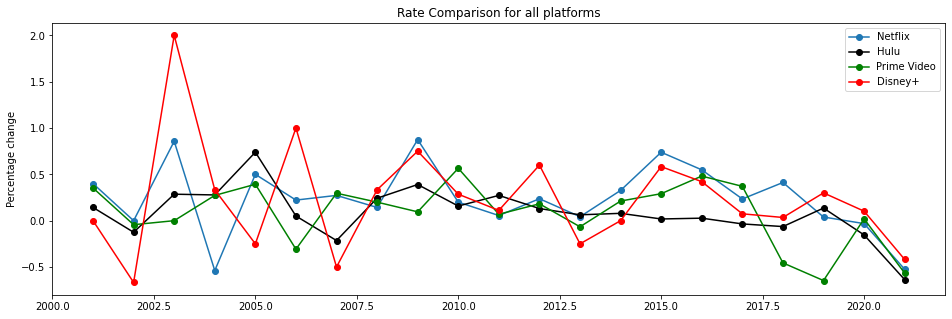

In [576]:
plt.figure(figsize=(16, 5))
plt.plot(list(rates['Netflix'].keys()), list(rates['Netflix'].values()), 'o-', label='Netflix')
plt.plot(list(rates['Hulu'].keys()), list(rates['Hulu'].values()), 'o-', color='black', label='Hulu')
plt.plot(list(rates['Prime Video'].keys()), list(rates['Prime Video'].values()), 'o-', color='green', label='Prime Video')
plt.plot(list(rates['Disney+'].keys()), list(rates['Disney+'].values()), 'o-', color='red', label='Disney+')
plt.title('Rate Comparison for all platforms')
plt.ylabel('Percentage change')
plt.legend()